In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import sympy as sym

# Involute Gear Calculator

This Jupyter Notebook contains all the calculations for generating a gear tooth profile coordinates that be imported into 3d modeling software.

As of 11/27/2022, only gears with a module = 1 are supported.

### Calculations for tooth profile with module = 1

base diameter 84.57255
base circ 265.6925017753555
ref diameter 90
tip diameter 92


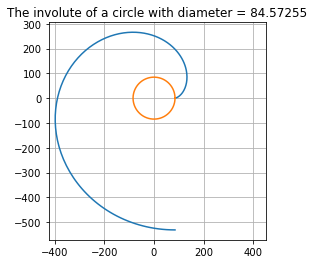

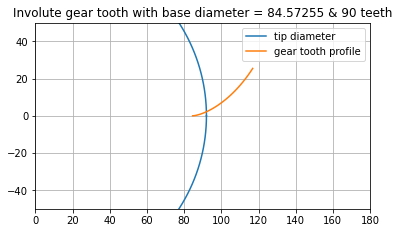

In [14]:
u = np.linspace(0,2*np.pi,200)
z = 90 # number of teeth 
ref_dia1 = z # reference diameter
tip_dia1 = ref_dia1 + 2
base_dia1 = ref_dia1*.9396950000000001
base_circ = base_dia1*np.pi
print('base diameter',base_dia1)
print('base circ',base_circ)
print('ref diameter',ref_dia1)
print('tip diameter',tip_dia1)
x = base_dia1*(np.cos(u) + u * np.sin(u))
y = base_dia1*(np.sin(u) - u * np.cos(u))


# Involute of a circle
plt.title("The involute of a circle with diameter = %s"%base_dia1)
plt.plot(x,y)
plt.plot(base_dia1*np.cos(u),base_dia1*np.sin(u),label="base diameter")
plt.grid('on')
plt.axis('square')
plt.show()

# Involute of gear tooth
pitch1 = (np.pi*ref_dia1) / z # pitch
pitch1 = np.pi / z # pitch
module1 = ref_dia1 / z # module
plt.plot(tip_dia1*np.cos(u),tip_dia1*np.sin(u),label="tip diameter")

u1_min = 0
u1_max = 1
u1_step = 100
u1 = np.linspace(u1_min,u1_max,u1_step)
x = base_dia1 * (np.cos(u1) + u1 * np.sin(u1))
y = base_dia1 * (np.sin(u1) - u1 * np.cos(u1))

plt.plot(x,y,label="gear tooth profile")
plt.title('Involute gear tooth with base diameter = %s & %s teeth'%(base_dia1,z))
plt.axis('square')
plt.axis([0,z*2,-50,50])
plt.grid('on')
plt.legend()
plt.show()

The gear tooth profile protrudes outside of the tip diameter. All of the vertices outside this circle need to be removed. This is simple enough to do in Blender once the plots have been generated there.

### Exportation

The cell below will generate and print your gear tooth coordinates.

###### Note: This cell also generates an external .txt file named "mesh_data.txt" where the coordinates are stored. However, you only need to copy and paste what is printed at the end of this script.

In [133]:
# this data is reliant on external .txt files to save coordinates too
# change paths as required
y_list = y
x_list = x
tip_coords = []
tooth_coords = []


for i in range(len(x_list)):
    tooth_coords.append([x_list[i],y_list[i],0])

for i in u:
    tooth_coords.append([tip_dia1*np.cos(i),tip_dia1*np.sin(i),0])

read_data = open("mesh_data.txt","w")
read_data.write(str(tooth_coords))
read_data.close()

print(tooth_coords)

[[84.57255, 0.0, 0], [84.57686437571522, 2.9053479771310046e-05, 0], [84.58980618227204, 0.00023242072381614575, 0], [84.6113714581288, 0.0007843799257985962, 0], [84.64155360146444, 0.0018591381436138602, 0], [84.68034337130133, 0.003630795745103816, 0], [84.7277288890767, 0.006273310870117553, 0], [84.78369564066277, 0.009960463914322537, 0], [84.84822647883526, 0.014865822040236645, 0], [84.92130162618973, 0.021162703720883497, 0], [85.00289867850566, 0.029024143321527862, 0], [85.09299260855748, 0.038622855724883554, 0], [85.19155577037213, 0.050131201005245006, 0], [85.29855790393273, 0.06372114915691916, 0], [85.41396614032719, 0.07956424488239412, 0], [85.53774500734161, 0.09783157244560013, 0], [85.66985643549735, 0.11869372059570746, 0], [85.81025976453083, 0.14232074756676058, 0], [85.95891175031534, 0.16888214615858596, 0], [86.11576657222382, 0.1985468089042825, 0], [86.28077584093154, 0.2314829933296765, 0], [86.45388860665749, 0.26785828731003036, 0], [86.63505136784333, 

###  Creating plots in Blender

##### Step 1:
You will need to copy the cell below and paste it into Blender's text editor.

##### Step 2:
Copy the coordinates from the cell above and paste it into the "#...PASTE COORDINATES HERE..." variable declaration.


In [ ]:
import bpy
from math import *
import math

def createMeshFromData(name, origin, verts, edges, faces):
    # Create mesh and object
    me = bpy.data.meshes.new(name+'Mesh')
    ob = bpy.data.objects.new(name, me)
    ob.location = origin
    ob.show_name = False
    # Link object to scene and make active
    bpy.context.collection.objects.link(ob)
    ob.select_set(True)

    # Create mesh from given verts, faces.
    me.from_pydata(verts, edges, faces)

    # Update mesh with new data
    me.update()

# This script will NOT work if you do not replace the "#...PASTE COORDINATES HERE..." with the coordinate array you want to plot.
verts1 = #...PASTE COORDINATES HERE...

# Adds z coordinate.
for i in verts1:
    i.append(0)
#print(verts1)

edges1 = [[len(verts1) - 1, 0]]
for i in range( 0, len(verts1)-1):
    edges1.append( [i, i+1] )

createMeshFromData( 'Pitch1', [0, 0, 0], verts1, edges1, [] )

If you run the script above in Blender (with the coordinates you generated), you should se geometry in the 3d viewport that looks similar to the plot below.

You will need to detatch and save all the tooth coordinates inside the circle, and delete everything else (including the circle itslef). 

You now have your gear tooth profile.

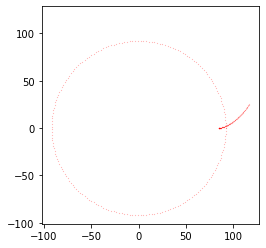

In [131]:
for i in tooth_coords:
    plt.plot(i[0],i[1],'ro',markersize=".1")
plt.axis('square')
plt.show()

For two gears to be compatible, they must have the same module. I will be adding new modules over time.

You can download this notebook from my github repository [here](https://github.com/Nefari0/gear-calulators.git)

Please contact me through my portfolio site:

[chris.madmodels3d.com](http://chris.madmodels3d.com/)